In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%cd ..

/mnt/d/anomaly-detection


In [3]:
data = pd.read_csv('data/processed/tep_data.csv', index_col='Index')
print(f'Len of dataset: {data.shape[0]}')

Len of dataset: 12801


/home/elch10/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/__init__.py:62: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


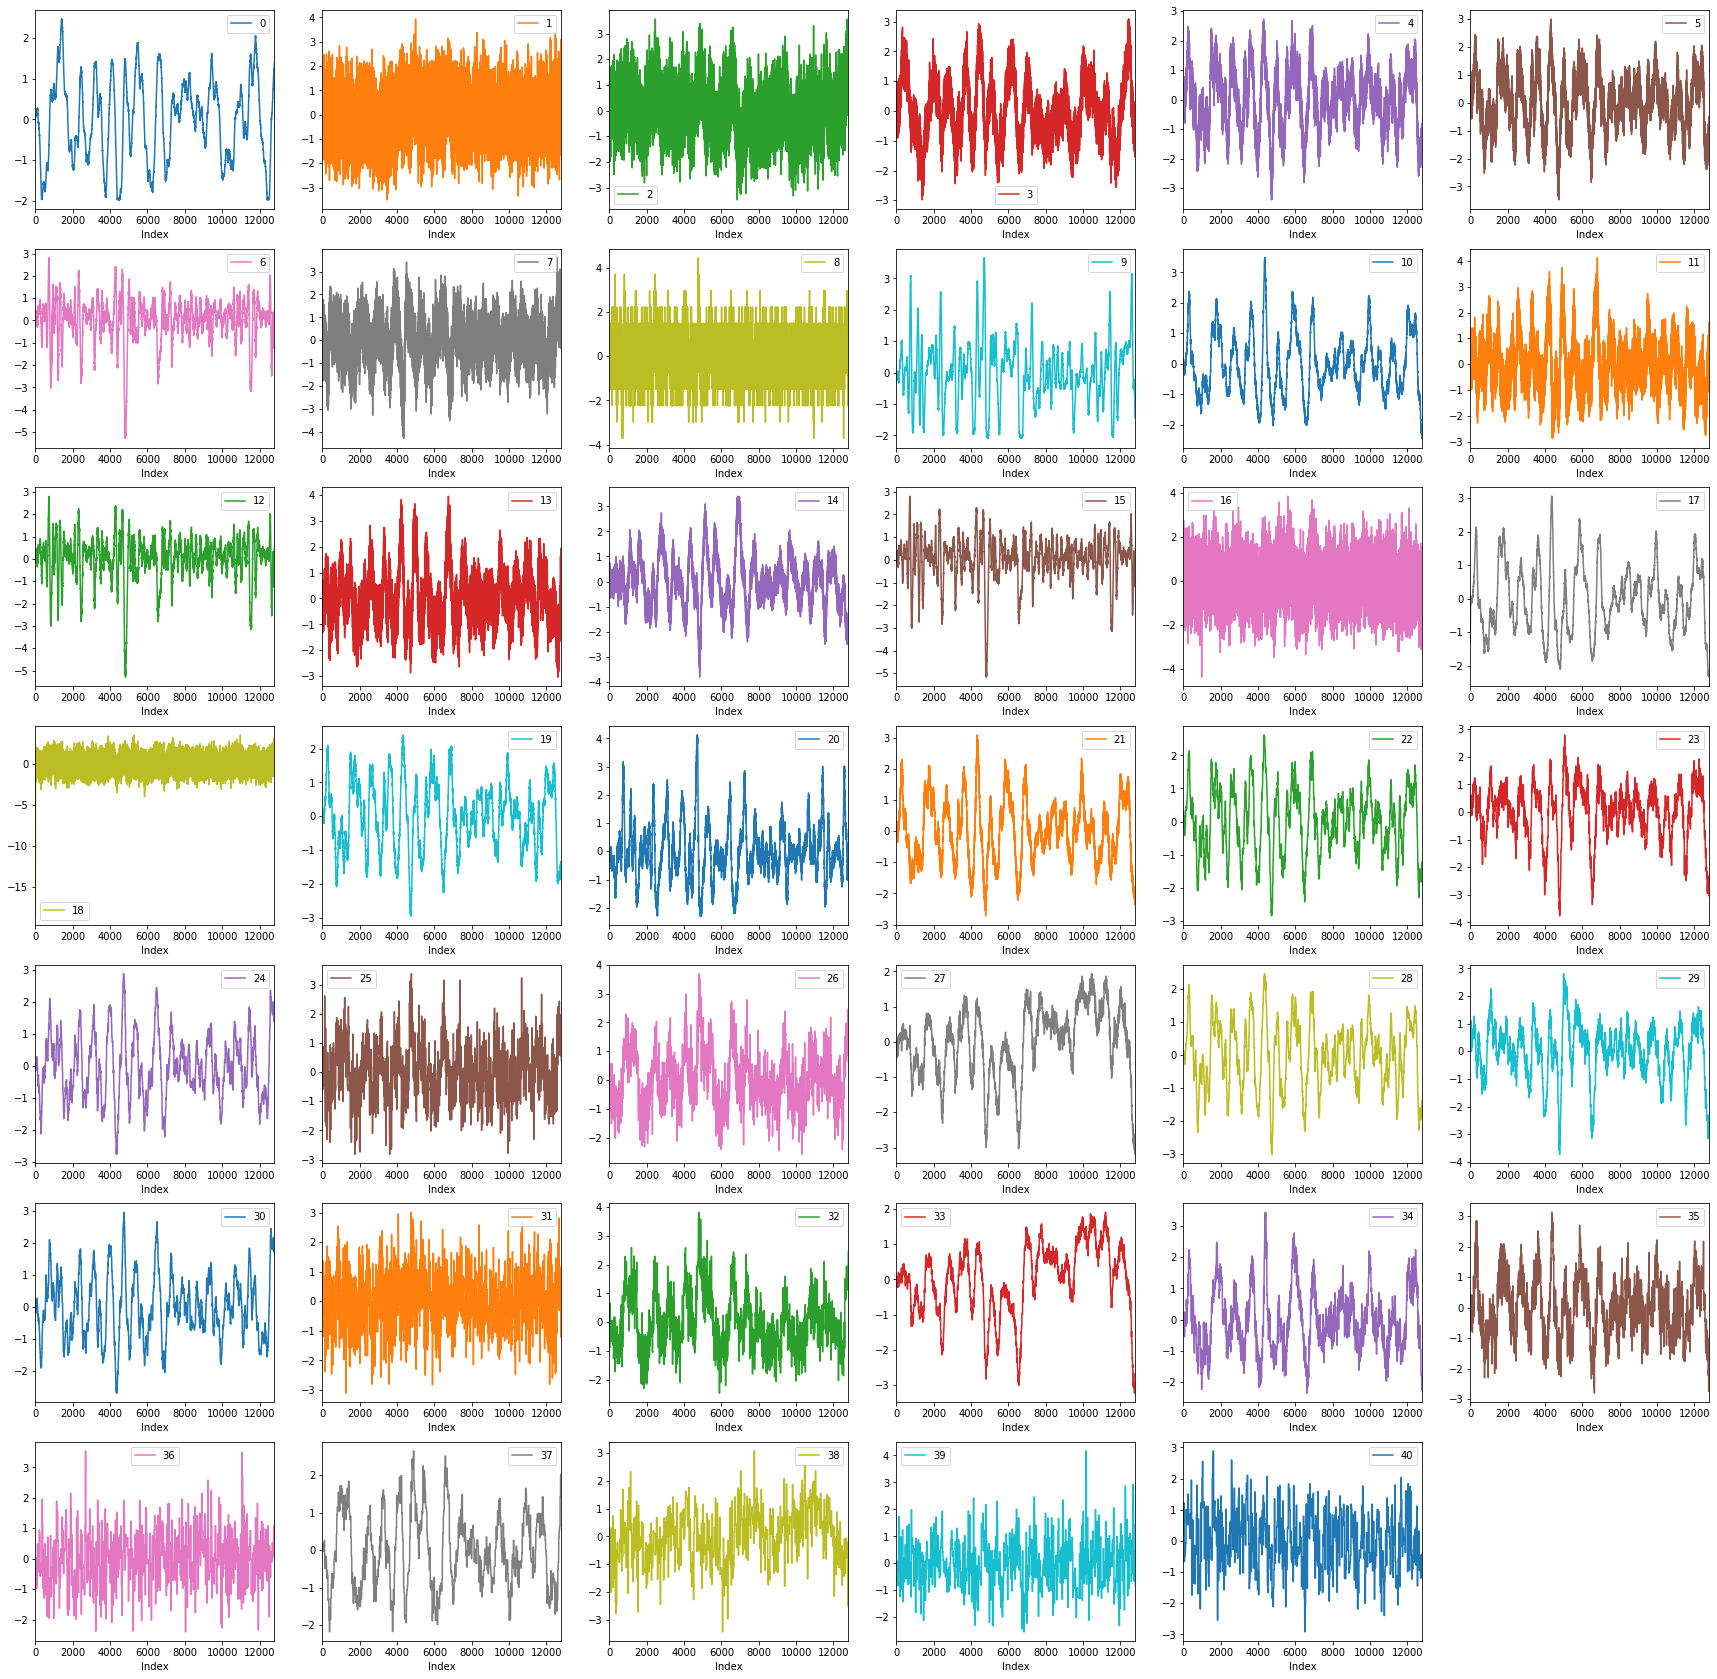

In [4]:
plt.figure(figsize=(30, 30))
data.plot(subplots=True, layout=(7, 6), ax=plt.gca());

Throw out not fully examples

In [5]:
window_length = 32
stride = 0

X = np.array([
    data.iloc[i - window_length:i].to_numpy().flatten()
    for i in range(window_length, data.shape[0] - window_length - stride)
]).reshape(-1, window_length, data.shape[1])
y = np.array([
    data.iloc[i - window_length:i].to_numpy().flatten()
    for i in range(2 * window_length+stride, data.shape[0])
]).reshape(-1, window_length, data.shape[1])

In [6]:
from src.models.lstm import build_model
import keras

build_params = dict(
    input_length=window_length,
    input_shape=data.shape[1],
    lstm_layers_size=[32, 32],
    dropout_coeff=0.1,
    optimizer=keras.optimizers.Adam(lr=0.01),
    reg_strength=0.005,
)

fit_params = dict(
    batch_size=64,
    epochs=10,
    verbose=1,
    callbacks=[keras.callbacks.ReduceLROnPlateau()]
)

Using TensorFlow backend.


In [7]:
from src.utils import cross_validate

results = cross_validate(lambda: build_model(**build_params), 3, fit_params, X, y)

W0909 20:08:22.005311 140706381301568 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0909 20:08:22.007599 140706381301568 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0909 20:08:22.011648 140706381301568 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Fold 0...


W0909 20:08:22.448834 140706381301568 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0909 20:08:22.906301 140706381301568 deprecation.py:323] From /home/elch10/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0909 20:08:23.935732 140706381301568 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0909 20:08:24.044143 140706381301568 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.7/site-packages/keras/b

Train on 3185 samples, validate on 3184 samples
Epoch 1/10
3185/3185 [==============================] - 4s 1ms/step - loss: 0.5776 - val_loss: 0.5927
Epoch 2/10
3185/3185 [==============================] - 2s 752us/step - loss: 0.3618 - val_loss: 0.5657
Epoch 3/10
3185/3185 [==============================] - 2s 747us/step - loss: 0.3297 - val_loss: 0.5672
Epoch 4/10
3185/3185 [==============================] - 2s 743us/step - loss: 0.3185 - val_loss: 0.5791
Epoch 5/10
3185/3185 [==============================] - 2s 743us/step - loss: 0.3126 - val_loss: 0.5696
Epoch 6/10
3185/3185 [==============================] - 2s 745us/step - loss: 0.2925 - val_loss: 0.5825
Epoch 7/10
3185/3185 [==============================] - 2s 765us/step - loss: 0.3024 - val_loss: 0.6133
Epoch 8/10
3185/3185 [==============================] - 2s 752us/step - loss: 0.2894 - val_loss: 0.6013
Epoch 9/10
3185/3185 [==============================] - 2s 755us/step - loss: 0.2854 - val_loss: 0.6259
Epoch 10/10
3185/3

In [8]:
from src.visualization.visualize import visualize_result

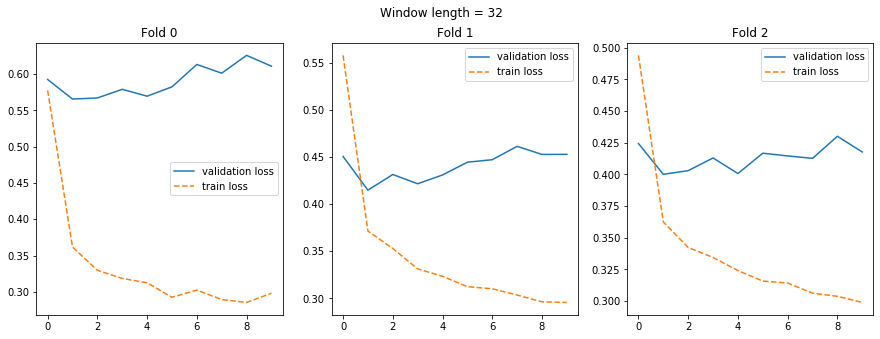

In [9]:
visualize_result(results, f'Window length = {window_length}')